### Data Exploration

In [1]:
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [5]:
# Data path
data_path = "../data/external/"
if not os.path.exists(data_path):
    raise FileNotFoundError
else:
    print("Path exists")

Path exists


In [50]:
# read images and annotations
training_images = os.listdir(os.path.join(data_path,"images/train"))
# sort the image and annotation lists
training_images = sorted(training_images)
# initialize the annotations
training_annotations = [image.split('.')[0]+"_mask.png" for image in training_images]
# add the relative path prefix
training_images = ["images/train/"+image for image in training_images]
training_annotations = ["annotations/train/"+image for image in training_annotations]

training_images[0],training_annotations[0]


('images/train/1001.jpg', 'annotations/train/1001_mask.png')

In [51]:
# test if the file names match in the order they exist
if all([image.split('.')[0] == training_annotations[i].split('_')[0] for i,image in enumerate(training_images)]):
    print("All images match")

In [78]:
# Read the annotation data
import json
with open('../data/external/annotations-info.json') as f:
    annotation_info = json.load(f)
annotation_info

{'background': [0, 0, 0], 'leaf': [0, 176, 0], 'symptom': [255, 0, 0]}

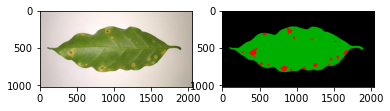

In [80]:
# Read a sample image and its corresponding annotation
import random
idx = random.randint(0,len(training_images))
sample_image_name = training_images[idx]
sample_annotation_name = training_annotations[idx]

sample_image = cv.imread(os.path.join(data_path,sample_image_name))
sample_annotation = cv.imread(os.path.join(data_path,sample_annotation_name))
# convert both image and annotations to RGB
sample_image = cv.cvtColor(sample_image,cv.COLOR_BGR2RGB)
sample_annotation = cv.cvtColor(sample_annotation,cv.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(sample_image)
plt.subplot(1,2,2)
plt.imshow(sample_annotation)


In [81]:
# separate the masks for a sample image
leaf = cv.inRange(sample_annotation,np.array(annotation_info["background"]),np.array(annotation_info["symptom"]))
# inverse
leaf = cv.bitwise_not(leaf)
symptom = cv.inRange(sample_annotation,np.array(annotation_info["background"]),np.array(annotation_info["leaf"]))
symptom = cv.bitwise_not(symptom)

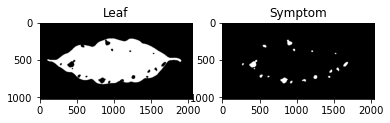

In [82]:
plt.subplot(1,2,1)
plt.imshow(leaf,"gray")
plt.title("Leaf")
plt.subplot(1,2,2)
plt.title("Symptom")
plt.imshow(symptom,"gray")